## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

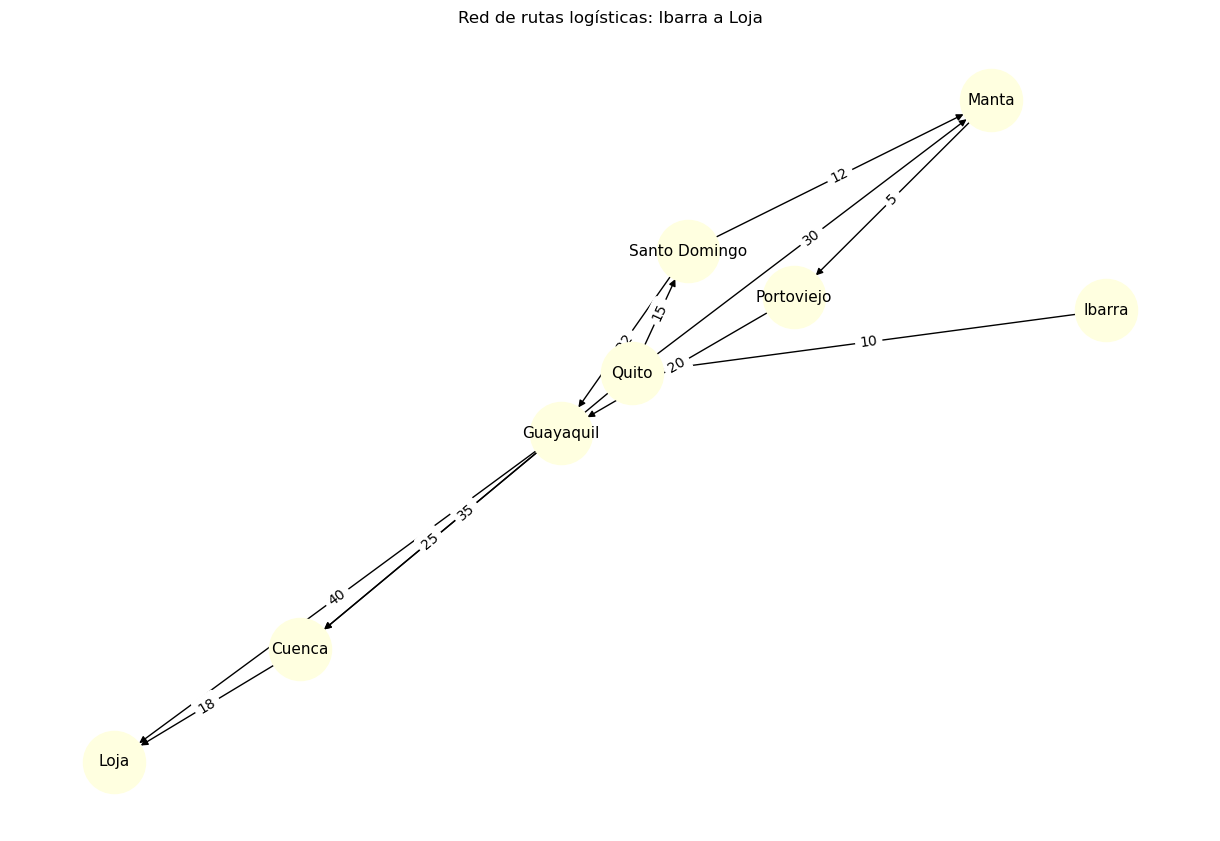

Camino más económico: ['Ibarra', 'Quito', 'Cuenca', 'Loja']
Costo total: 63
❌ El camino NO pasa por ninguna ciudad costera. Revisa otras rutas posibles.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir aristas con pesos
edges = [
    ('Ibarra', 'Quito', 10),
    ('Quito', 'Santo Domingo', 15),
    ('Quito', 'Manta', 30),
    ('Santo Domingo', 'Manta', 12),
    ('Manta', 'Portoviejo', 5),
    ('Portoviejo', 'Guayaquil', 20),
    ('Guayaquil', 'Cuenca', 25),
    ('Cuenca', 'Loja', 18),
    ('Quito', 'Cuenca', 35),
    ('Santo Domingo', 'Guayaquil', 22),
    ('Guayaquil', 'Loja', 40),
]

for origen, destino, costo in edges:
    G.add_edge(origen, destino, weight=costo)

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=2000, font_size=11, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Red de rutas logísticas: Ibarra a Loja")
plt.axis('off')
plt.show()

# Calcular ruta más corta
camino = nx.dijkstra_path(G, source='Ibarra', target='Loja')
costo = nx.dijkstra_path_length(G, source='Ibarra', target='Loja')

# Verificar si pasa por una ciudad costera
costera = {'Manta', 'Portoviejo', 'Guayaquil'}
interseccion = set(camino).intersection(costera)

print("Camino más económico:", camino)
print("Costo total:", costo)
if interseccion:
    print("✅ El camino pasa por al menos una ciudad costera:", interseccion)
else:
    print("❌ El camino NO pasa por ninguna ciudad costera. Revisa otras rutas posibles.")

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.
